In [2]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pprint
import json
import requests
import os
from scipy.stats import linregress


In [3]:
#Reading CSV for whale data
filename = "resources\seamap_csv.csv"
seamap_data = pd.read_csv(filename, header=0, index_col=0)
#seamap_data
seamap_data.reset_index(drop=True, inplace=True)
seamap_data.drop(['oid', 'datasets', 'geom_wkt', 'csquare'], axis = "columns", inplace=True)
seamap_data


,longitude,latitude,providers,species,date_min,date_max,num_records,num_animals,num_species
0,-179,-72,"David Bowden, NIWA;Rochelle Constantine, Unive...",Balaenoptera bonaerensis,2/26/2018,2/26/2018,2,4.0,1
1,-179,-71,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,2/28/2018,3/1/2018,3,6.0,1
2,-179,-69,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/2/2018,3/2/2018,1,2.0,1
3,-179,-68,"David Bowden, NIWA;Rochelle Constantine, Unive...",Balaenoptera acutorostrata;Megaptera novaeangliae,12/23/1910,3/6/2018,6,24.0,2
4,-179,-67,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/6/2018,3/6/2018,5,11.0,1
...,...,...,...,...,...,...,...,...,...
16138,180,62,National Marine Mammal Laboratory;Wildlife Con...,Balaena mysticetus;Balaenoptera acutorostrata;...,6/1/1913,7/31/2010,10,21.0,4
16139,180,64,Russian Cetacean Habitat Project via Happywhal...,Balaena mysticetus;Megaptera novaeangliae,6/1/1913,8/3/2005,18,18.0,2
16140,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,7/1/1913,11,11.0,1
16141,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,6/1/1913,1,1.0,1


In [4]:
seamap_data = seamap_data.rename(columns={"longitude": "Longitude", "latitude": "Latitude", 
                            "providers": "Providers", "species": "Species", 
                            "date_min" : "First Sighting", "date_max": "Most Recent Sighting", "num_records" : 
                            "Number of Records", "num_animals": "Number Sighted" , "num_species" : "Number of Species Sighted"})
seamap_data

,Longitude,Latitude,Providers,Species,First Sighting,Most Recent Sighting,Number of Records,Number Sighted,Number of Species Sighted
0,-179,-72,"David Bowden, NIWA;Rochelle Constantine, Unive...",Balaenoptera bonaerensis,2/26/2018,2/26/2018,2,4.0,1
1,-179,-71,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,2/28/2018,3/1/2018,3,6.0,1
2,-179,-69,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/2/2018,3/2/2018,1,2.0,1
3,-179,-68,"David Bowden, NIWA;Rochelle Constantine, Unive...",Balaenoptera acutorostrata;Megaptera novaeangliae,12/23/1910,3/6/2018,6,24.0,2
4,-179,-67,"David Bowden, NIWA;Rochelle Constantine, Unive...",Megaptera novaeangliae,3/6/2018,3/6/2018,5,11.0,1
...,...,...,...,...,...,...,...,...,...
16138,180,62,National Marine Mammal Laboratory;Wildlife Con...,Balaena mysticetus;Balaenoptera acutorostrata;...,6/1/1913,7/31/2010,10,21.0,4
16139,180,64,Russian Cetacean Habitat Project via Happywhal...,Balaena mysticetus;Megaptera novaeangliae,6/1/1913,8/3/2005,18,18.0,2
16140,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,7/1/1913,11,11.0,1
16141,180,65,Wildlife Conservation Society,Balaena mysticetus,6/1/1913,6/1/1913,1,1.0,1


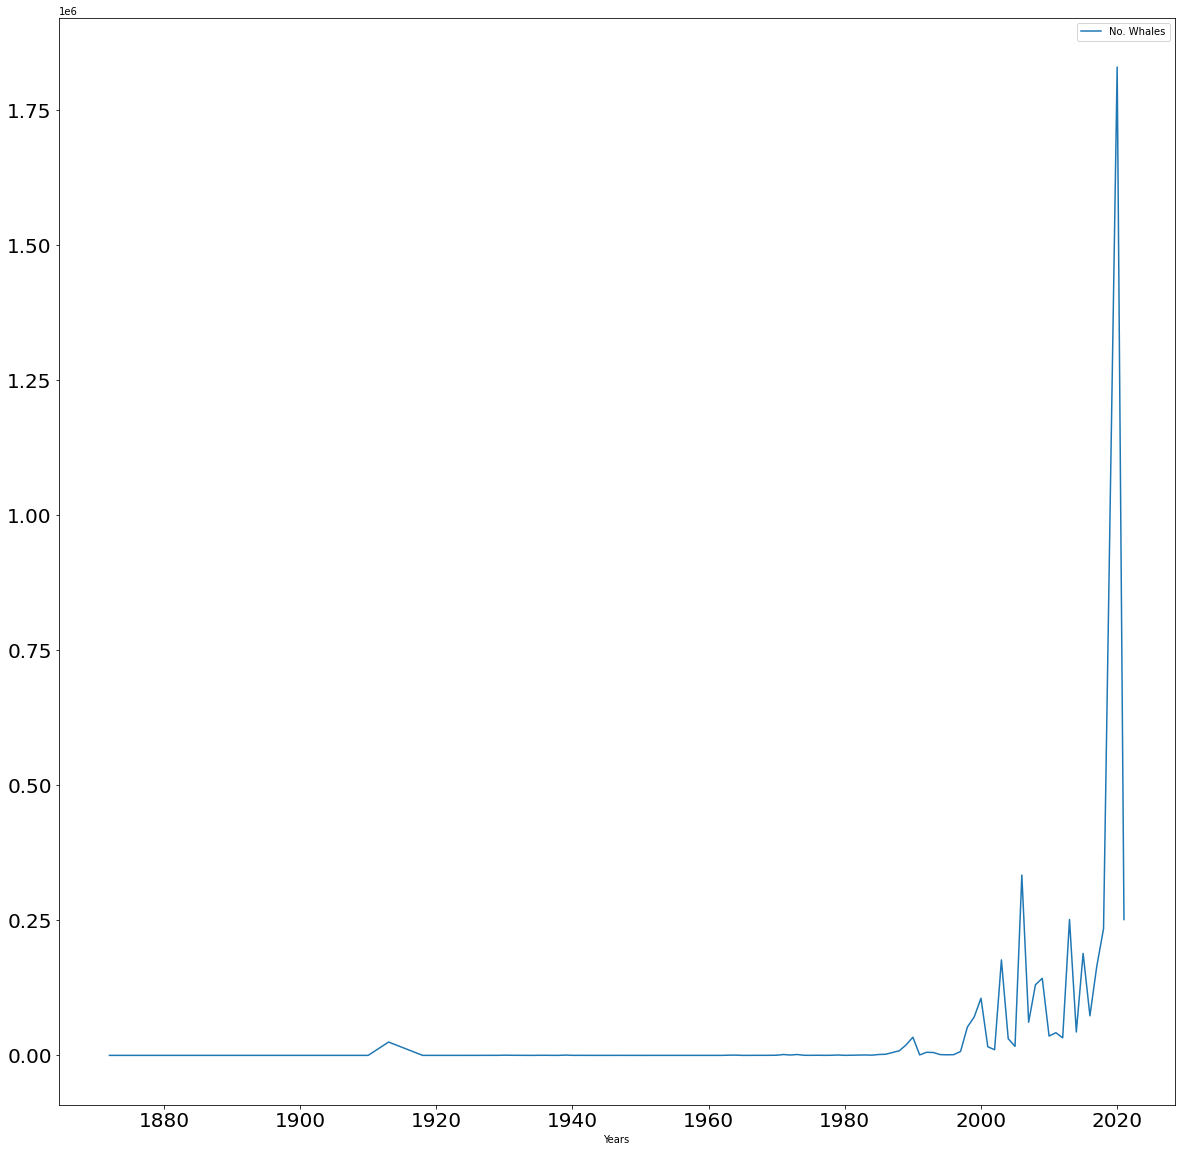

In [5]:
seamap_data3 = seamap_data.copy()

seamap_data3['Year'] = pd.DatetimeIndex(seamap_data3['Most Recent Sighting']).year
seamap_data3['Month'] = pd.DatetimeIndex(seamap_data3['Most Recent Sighting']).month
seamap_data3['Date'] = pd. DatetimeIndex(seamap_data3['Most Recent Sighting']).day


seamap_data4 = seamap_data3[['Year', 'Number Sighted']].copy()
seamap_data4 = seamap_data4.set_index('Year')


seamap_data5 = seamap_data4.groupby(level=0).sum()
seamap_data6 = seamap_data5[seamap_data5['Number Sighted'] >=1]


yearseries = seamap_data6['Number Sighted'].astype(int)

yeararray = list(yearseries.index.astype(int))


barpanda = pd.DataFrame({'Years': yeararray, 'No. Whales': yearseries})


lineplot = barpanda.plot.line(x='Years', y='No. Whales', figsize=(20,20), logy=False, fontsize=20)



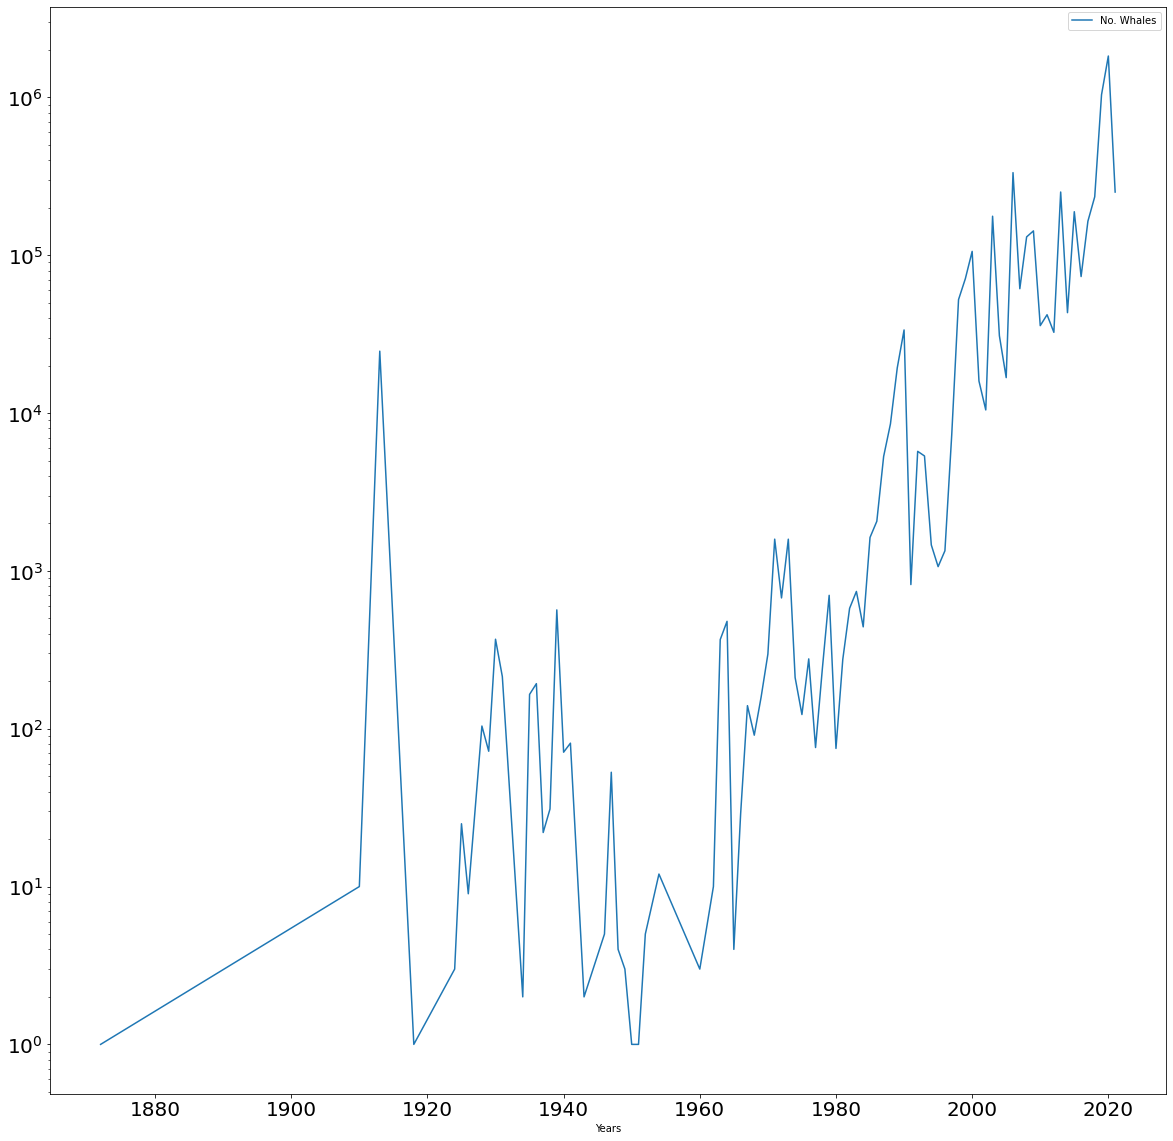

In [8]:
lineplot2 = barpanda.plot.line(x='Years', y='No. Whales', figsize=(20,20), logy=True, fontsize=20)

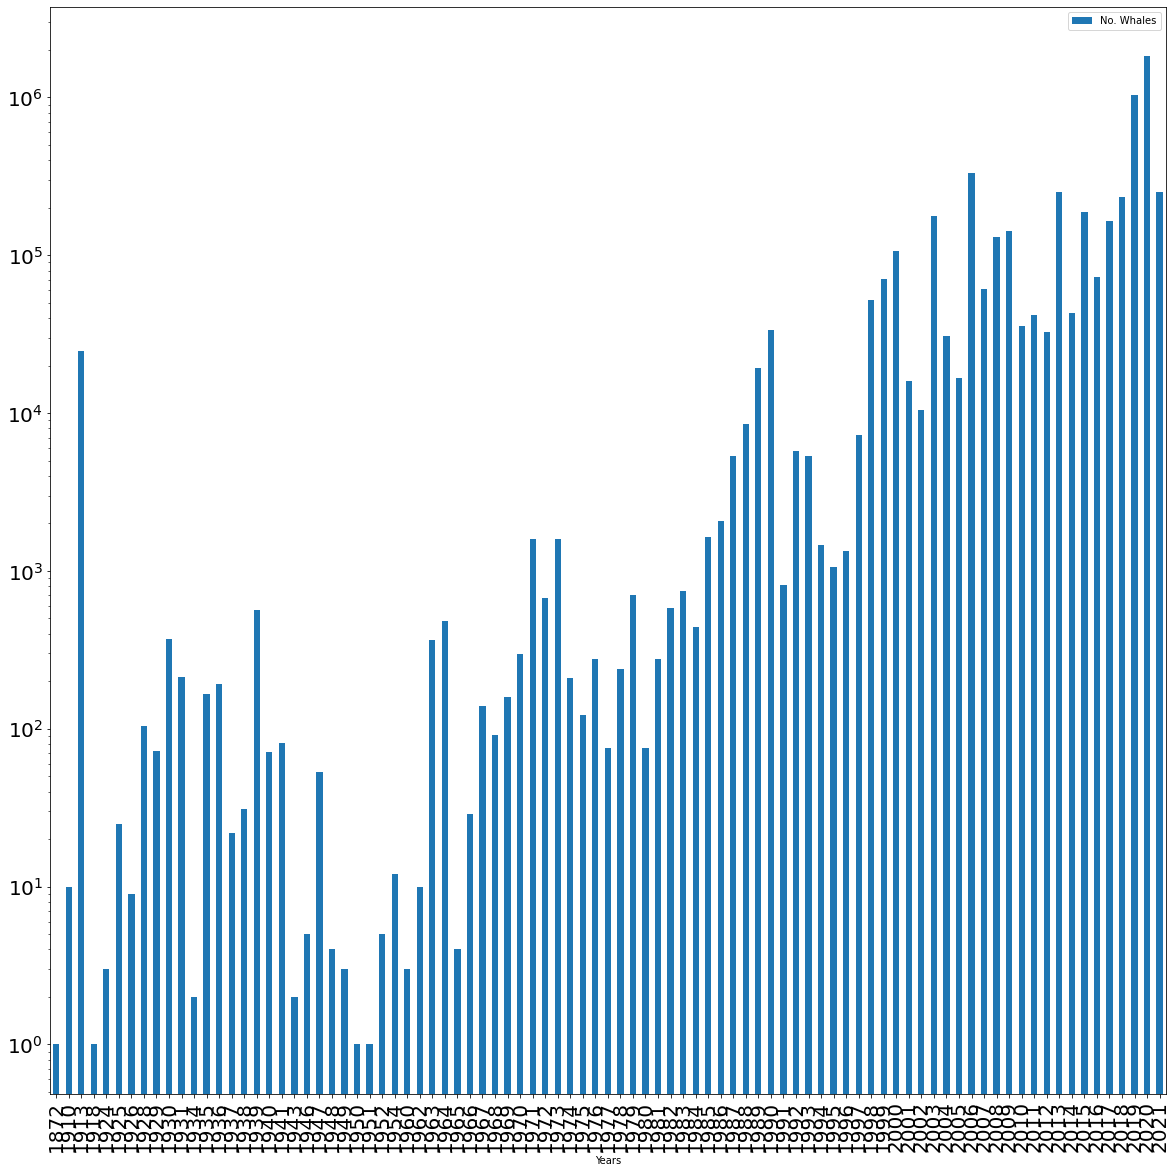

In [6]:
lineplot2 = barpanda.plot.bar(x='Years', y='No. Whales', figsize=(20,20), logy=True, fontsize=20)




In [ ]:
#seamap_data3['Date Last Sighting'] = pd.to_datetime(seamap_data3['Most Recent Sighting'], format='%Y%m%d')